In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import wget
import zipfile

In [ ]:
http://images1.cafef.vn/data/20200911/CafeF.SolieuGD.Upto11092020.zip

In [3]:
#download latest data
day = '10'
month = '09'
year = '2020'
file = wget.download('http://images1.cafef.vn/data/{}{}{}/CafeF.SolieuGD.Upto{}{}{}.zip'
                     .format(year, month, day, day, month, year), out = './Cafef_data')
file_index = wget.download('http://images1.cafef.vn/data/{}{}{}/CafeF.Index.Upto{}{}{}.zip'
                     .format(year, month, day, day, month, year), out = './Cafef_data')

In [19]:
print('http://images1.cafef.vn/data/{}{}{}/CafeF.Index.Upto{}{}{}.zip'.format(year, month, day, day, month, year))

http://images1.cafef.vn/data/20200911/CafeF.Index.Upto11092020.zip


In [9]:
file

'./Cafef_data/CafeF.SolieuGD.Upto11092020 (1).zip'

In [28]:
#unzip file, file_index

file = zipfile.ZipFile(file)
file.extractall('./Cafef_data')
file.close()

file_index = zipfile.ZipFile(file_index)
file_index.extractall('./Cafef_data')
file_index.close()

In [4]:
#load file to notebook
df = pd.read_csv('./Cafef_data/CafeF.HSX.Upto{}.{}.{}.csv'.format(day,month,year))
df_index = pd.read_csv('./Cafef_data/CafeF.INDEX.Upto{}.{}.{}.csv'.format(day, month, year))
df = df.append(df_index)
df.head()

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,FUCVREIT,20200910,5.81,5.81,5.81,5.81,10
1,VPD,20200910,15.00,15.20,15.00,15.15,26150
2,VPG,20200910,11.80,12.00,11.60,11.90,616780
3,VPH,20200910,4.42,4.55,4.42,4.52,263240
4,VPI,20200910,40.70,41.10,40.55,40.95,844300


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869555 entries, 0 to 8483
Data columns (total 7 columns):
<Ticker>        869555 non-null object
<DTYYYYMMDD>    869555 non-null int64
<Open>          869555 non-null float64
<High>          869555 non-null float64
<Low>           869555 non-null float64
<Close>         869555 non-null float64
<Volume>        869555 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 53.1+ MB


In [6]:
# rename columns more readable
df.columns = ['Code', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df.head()

,Code,Date,Open,High,Low,Close,Volume
0,FUCVREIT,20200910,5.81,5.81,5.81,5.81,10
1,VPD,20200910,15.00,15.20,15.00,15.15,26150
2,VPG,20200910,11.80,12.00,11.60,11.90,616780
3,VPH,20200910,4.42,4.55,4.42,4.52,263240
4,VPI,20200910,40.70,41.10,40.55,40.95,844300


In [7]:
#change 'Date' to type datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d', errors='ignore')
#df.reset_index(inplace=True)
df.head()

,Code,Date,Open,High,Low,Close,Volume
0,FUCVREIT,2020-09-10,5.81,5.81,5.81,5.81,10
1,VPD,2020-09-10,15.00,15.20,15.00,15.15,26150
2,VPG,2020-09-10,11.80,12.00,11.60,11.90,616780
3,VPH,2020-09-10,4.42,4.55,4.42,4.52,263240
4,VPI,2020-09-10,40.70,41.10,40.55,40.95,844300


In [8]:
date = datetime(int(year), int(month), int(day)).date()
#date
first_date = date - timedelta(days=365*5+1)
print(date, first_date)

2020-09-10 2015-09-11


In [9]:
#slice 5 yrs of data
date = datetime(int(year), int(month), int(day)).date()
first_date = date - timedelta(days=365*5+1)

df_recent_5yr = df[df['Date']>first_date][['Date', 'Code', 'Close']]
df_recent_5yr.tail(20)

C:\Users\vnris\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """


,Date,Code,Close
2479,2015-09-25,VNINDEX,570.3800
2480,2015-09-25,HNX-INDEX,78.6734
2481,2015-09-24,VNINDEX,570.2500
2482,2015-09-24,HNX-INDEX,78.6067
2483,2015-09-23,VNINDEX,572.7200
2484,2015-09-23,HNX-INDEX,78.4733
2485,2015-09-22,VNINDEX,573.2000
2486,2015-09-22,HNX-INDEX,78.3537
2487,2015-09-21,VNINDEX,572.1200
2488,2015-09-21,HNX-INDEX,78.0713


In [10]:
Code_list = list(df['Code'].unique())

In [47]:
# create dict to store beta 

df_idx = df_recent_5yr.loc[df_recent_5yr['Code']=='VNINDEX']
df_idx.set_index('Date', inplace = True)
df_idx = df_idx.sort_index()
df_idx['Return'] = df_idx['Close'].pct_change()
#df_idx['log_return'] = np.log(df_idx['Close']/df_idx['Close'].shift(1))
idx_rtn_var = df_idx['Return'].var()
#idx_rtn_var = df_idx['log_return'].var()

beta_dict = {}
for code in Code_list:
    df_each = df_recent_5yr.loc[df_recent_5yr['Code']==code]
    df_each.set_index('Date', inplace = True)
    df_each = df_each.sort_index()
    df_each['Return'] = df_each['Close'].pct_change()
    #df_each['log_return'] = np.log(df_each['Close']/df_each['Close'].shift(1))
    
    try:
        cum_rtn = df_each['Close'].iloc[-1]/df_each['Close'].iloc[0] - 1
    except:
        cum_rtn = None
        
    each_rtn_mean = df_each['Return'].mean()
    each_rtn_cov = df_each['Return'].cov(df_idx['Return'])
    each_rtn_std = df_each['Return'].std()
    
#     each_rtn_mean = df_each['log_return'].mean()
#     each_rtn_cov = df_each['log_return'].cov(df_idx['log_return'])
#     each_rtn_std = df_each['log_return'].std()
    
    each_beta = each_rtn_cov/idx_rtn_var
    
    beta_dict.update({code: {'beta': each_beta, 'cum return': cum_rtn,'rtn mean': each_rtn_mean,'rtn std':each_rtn_std}})
    
beta_dict

{'FUCVREIT': {'beta': -0.1525942129189195,
  'cum return': -0.42532146389713155,
  'rtn mean': 0.00021970223821364893,
  'rtn std': 0.04563703597432589},
 'VPD': {'beta': 0.44033736650909905,
  'cum return': 0.03779207167957921,
  'rtn mean': 0.0002398512538817109,
  'rtn std': 0.019111794936185436},
 'VPG': {'beta': 0.4017080243800413,
  'cum return': 0.8007657037362106,
  'rtn mean': 0.0011810376329331473,
  'rtn std': 0.023927111060348373},
 'VPH': {'beta': 0.48584499698864836,
  'cum return': 0.08902541862426205,
  'rtn mean': 0.00035024602325973015,
  'rtn std': 0.023819856620085574},
 'VPI': {'beta': 0.18423253240022897,
  'cum return': -0.024186822351960013,
  'rtn mean': -1.650632854832045e-05,
  'rtn std': 0.007463762948197814},
 'VPS': {'beta': 0.18208361702368966,
  'cum return': 0.5539229111346615,
  'rtn mean': 0.0013360681561601165,
  'rtn std': 0.04135682347548961},
 'VRC': {'beta': 0.7529068833806044,
  'cum return': 0.2565089427213041,
  'rtn mean': 0.00067092733385578

In [71]:
beta_df = pd.DataFrame(beta_dict).transpose()
beta_df.head()
#beta_df.to_csv('HOSE_beta.csv')

In [49]:
beta_df.describe()

,beta,cum return,rtn mean,rtn std
count,628.000000,639.000000,634.000000,631.000000
mean,3.250983,0.180843,-0.002202,0.083110
std,7.772427,1.064474,0.028972,0.205364
min,-78.793645,-0.999306,-0.200000,0.007464
25%,0.376446,-0.513274,-0.000830,0.022832
50%,0.781813,0.000000,0.000461,0.032342
75%,2.308965,0.557623,0.001171,0.074922
max,78.537472,9.583333,0.453375,3.609351


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE96023F88>,
      dtype=object)

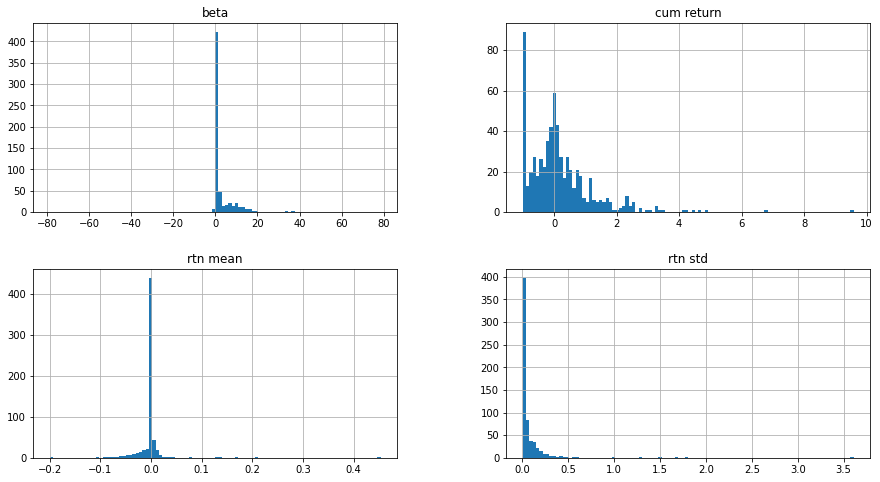

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
beta_df.hist(bins=100, figsize = (15,8))

In [50]:
beta_df.loc[beta_df['beta']==beta_df['beta'].max()]

,beta,cum return,rtn mean,rtn std
CVPB2004,78.537472,-0.92268,0.208992,1.274411


In [61]:
beta_df.loc[beta_df['cum return']==beta_df['cum return'].max()]

,beta,cum return,rtn mean,rtn std
GAB,0.398581,9.583333,0.008708,0.036305


In [52]:
beta_df.loc[beta_df['rtn mean']==beta_df['rtn mean'].max()]

,beta,cum return,rtn mean,rtn std
CMSN1901,5.372771,-0.537572,0.453375,3.609351


In [53]:
beta_df.loc[beta_df['rtn std']==beta_df['rtn std'].max()]

,beta,cum return,rtn mean,rtn std
CMSN1901,5.372771,-0.537572,0.453375,3.609351


In [60]:
beta_dict['VIC']

{'beta': 0.9167286244874163,
 'cum return': 2.562501230145452,
 'rtn mean': 0.0011731140091014915,
 'rtn std': 0.017661031090929435}